## Метод отжига

### Реализация:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import random

plt.rcParams["animation.html"] = "jshtml"
%matplotlib inline

In [12]:
def rand_bit(p):
    return int(random.random() >= p)

def f(x, y):
    return 0

def step():
    global x, y
    global T
    global h
    
    #counting new x
    if (rand_bit(1/2)): x_new = x+h
    else: x_new = x-h
        
    if (rand_bit(1/2)): y_new = y+h
    else: y_new = y-h
    
    #doing a step
    if (f(x_new, y_new) >= f(x, y)):
        p = np.exp(-(f(x_new, y_new)-f(x, y))/T)
        if (rand_bit(p)):
            return
    
    #updating x, y and T
    x = x_new
    y = y_new
    T /= 2
    return

def update(frame):
    global x, y
    global X, Y
    global T

    ax.cla()
    ax.set_title("T = %.2e" % T)
    ax.grid()
    ax.contourf(X, Y, f(X[:], Y[:]), 100, cmap='jet')
    ax.scatter(x, y, c='w')
    step()
    return

### Конкретная задача:

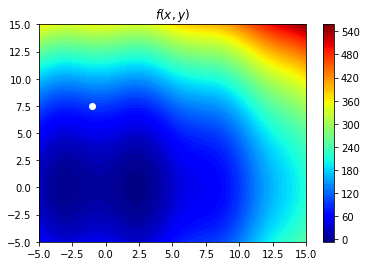

In [13]:
#целевая функция
def f(x, y):
    return x**2 + 10*np.sin(x+2) + 1.5*y**2

#параметры алгоритма
x0 = -1
y0 = 7.5
h = 0.25
T = 1000

#параметры изображений
left = -5
right = 15
bottom = -5
top = 15
N = 100

#изображение целевой функции
x_grid = np.linspace(left, right, N)
y_grid = np.linspace(bottom, top, N)
X, Y = np.meshgrid(x_grid, y_grid)

plt.contourf(X, Y, f(X[:], Y[:]), 100, cmap='jet')
plt.colorbar()
plt.title(r'$f(x,y)$')
plt.scatter(x0, y0, c='w')
plt.show()

min = f(-0.75, 4.75) = 43.90


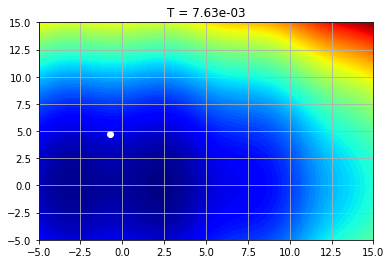

In [14]:
#пошаговая анимация алгоритма
x, y = x0, y0
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, update, frames=30)
anim.save('Simulated_annealing.gif', writer='imagemagick', fps=5)

print("min = f(%.2f, %.2f) = %.2f" % (x, y, f(x,y)))